## Importing  All the necessary Liberaries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading and Describing data

In [32]:
df = pd.read_csv("Covid19Data.csv")

In [33]:
df.head(5)

,Country,Confirmed,Deaths,Recovered,Active,NewCases,NewDeaths,NewRecovered,DeathsPer100Cases,RecoverPer100Cases,DeathsPer100Recovered,ConfirmedLastWeek,1WeekChange,1Week%Increase,WHORegion,total case,mortality,movingavg
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,46059,0.034994,2354355
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,6871,0.029508,2354355
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,35946,0.041576,2354355
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,959,0.057332,2354355
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,1617,0.043158,2354355


In [34]:
df.describe

<bound method NDFrame.describe of                 Country  Confirmed  Deaths  Recovered  Active  NewCases  \
0           Afghanistan      36263    1269      25198    9796       106   
1               Albania       4880     144       2745    1991       117   
2               Algeria      27973    1163      18837    7973       616   
3               Andorra        907      52        803      52        10   
4                Angola        950      41        242     667        18   
..                  ...        ...     ...        ...     ...       ...   
182  West Bank and Gaza      10621      78       3752    6791       152   
183      Western Sahara         10       1          8       1         0   
184               Yemen       1691     483        833     375        10   
185              Zambia       4552     140       2815    1597        71   
186            Zimbabwe       2704      36        542    2126       192   

     NewDeaths  NewRecovered  DeathsPer100Cases  RecoverPer100Cas

In [35]:
df.shape

(187, 18)

In [36]:
df.isnull

<bound method DataFrame.isnull of                 Country  Confirmed  Deaths  Recovered  Active  NewCases  \
0           Afghanistan      36263    1269      25198    9796       106   
1               Albania       4880     144       2745    1991       117   
2               Algeria      27973    1163      18837    7973       616   
3               Andorra        907      52        803      52        10   
4                Angola        950      41        242     667        18   
..                  ...        ...     ...        ...     ...       ...   
182  West Bank and Gaza      10621      78       3752    6791       152   
183      Western Sahara         10       1          8       1         0   
184               Yemen       1691     483        833     375        10   
185              Zambia       4552     140       2815    1597        71   
186            Zimbabwe       2704      36        542    2126       192   

     NewDeaths  NewRecovered  DeathsPer100Cases  RecoverPer100Cas

## Checking various conditions for india

In [37]:
cnf_ind = df.loc[df['Country'] == 'India', 'Confirmed']
cnf_ind


79    1480073
Name: Confirmed, dtype: int64

In [38]:
dt_ind = df.loc[df['Country']=="India","Deaths"]
dt_ind

79    33408
Name: Deaths, dtype: int64

In [39]:
cnf_indi= df.loc[df['Country']=="India","Recovered"]
cnf_indi

79    951166
Name: Recovered, dtype: int64

## Created New Column Death Percentage

In [40]:
percent = df.loc[:, ['Country', 'Deaths', 'Confirmed']]
percent['DeathPercentage'] = (percent['Deaths'] / percent['Confirmed']) * 100
percent

,Country,Deaths,Confirmed,DeathPercentage
0,Afghanistan,1269,36263,3.499435
1,Albania,144,4880,2.950820
2,Algeria,1163,27973,4.157581
3,Andorra,52,907,5.733186
4,Angola,41,950,4.315789
...,...,...,...,...
182,West Bank and Gaza,78,10621,0.734394
183,Western Sahara,1,10,10.000000
184,Yemen,483,1691,28.562980
185,Zambia,140,4552,3.075571


## Getting Country data With Highest Records

In [42]:
hc = df.loc[df["Deaths"].idxmax()]
hc


Country                        US
Confirmed                 4290259
Deaths                     148011
Recovered                 1325804
Active                    2816444
NewCases                    56336
NewDeaths                    1076
NewRecovered                27941
DeathsPer100Cases            3.45
RecoverPer100Cases           30.9
DeathsPer100Recovered       11.16
ConfirmedLastWeek         3834677
1WeekChange                455582
1Week%Increase              11.88
WHORegion                Americas
total case                7106703
mortality                0.034499
movingavg                 2354355
Name: 173, dtype: object

## Plotted Bar Graph of Death Percentage

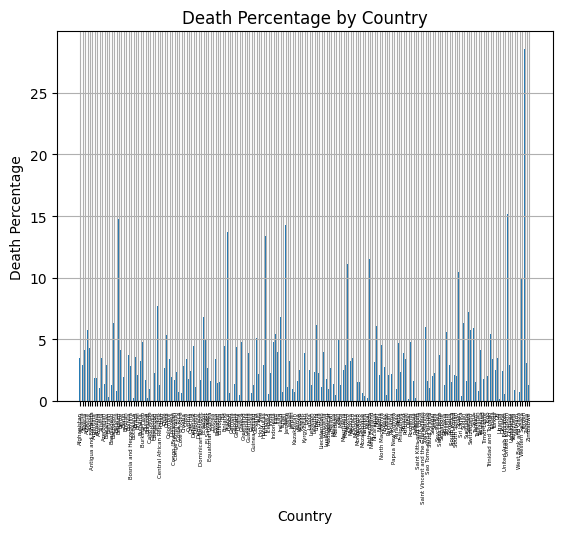

In [86]:
plt.bar(percent['Country'], percent['DeathPercentage'])
plt.xlabel('Country')
plt.ylabel('Death Percentage')
plt.title('Death Percentage by Country')
plt.xticks(rotation = 90, fontsize = 4)
plt.grid()
plt.show()

## Getting data of Countrys where Active cases is more than 5000

In [43]:
hcases = df[df["Active"] > 5000]
hcases


,Country,Confirmed,Deaths,Recovered,Active,NewCases,NewDeaths,NewRecovered,DeathsPer100Cases,RecoverPer100Cases,DeathsPer100Recovered,ConfirmedLastWeek,1WeekChange,1Week%Increase,WHORegion,total case,mortality,movingavg
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,46059,0.034994,2354355
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,35946,0.041576,2354355
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas,259198,0.018272,2354355
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe,47404,0.019016,2354355
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific,21128,0.010913,2354355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,United Arab Emirates,59177,345,52510,6322,264,1,328,0.58,88.73,0.66,57193,1984,3.47,Eastern Mediterranean,65499,0.005830,2354355
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe,556135,0.151948,2354355
179,Uzbekistan,21209,121,11674,9414,678,5,569,0.57,55.04,1.04,17149,4060,23.67,Europe,30623,0.005705,2354355
180,Venezuela,15988,146,9959,5883,525,4,213,0.91,62.29,1.47,12334,3654,29.63,Americas,21871,0.009132,2354355


## Confirmed Cases for Countries with Active Cases > 5000

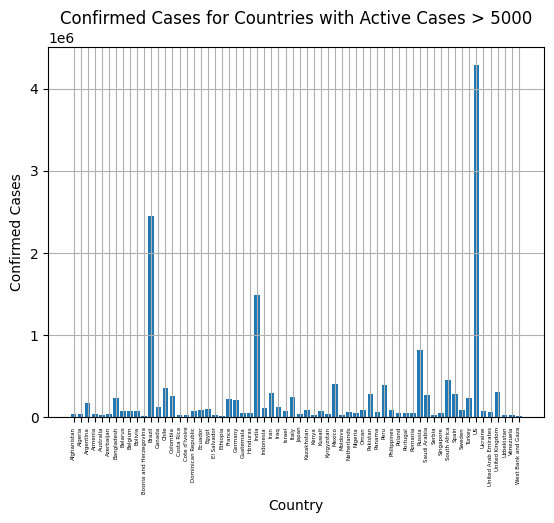

In [85]:
# plt.scatter(hcases['Confirmed'], hcases['Deaths'])
# plt.xlabel('Confirmed Cases')
# plt.ylabel('Deaths')
# plt.title('Confirmed Cases vs Deaths for Countries with Active Cases > 5000')
# plt.show()
hcases = df[df["Active"] > 5000]
plt.bar(hcases['Country'], hcases['Confirmed'])
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Cases for Countries with Active Cases > 5000')
plt.xticks(rotation = 90 , fontsize = 4)
plt.grid()
plt.show()

## Average Number of New Cases Per Day

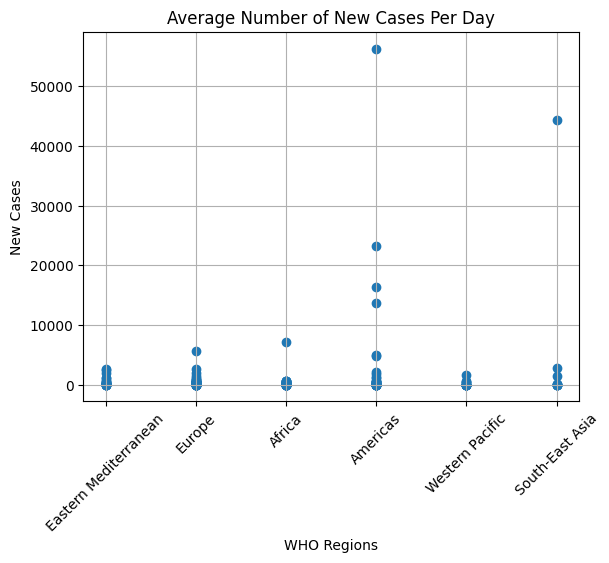

In [84]:
plt.scatter(df['WHORegion'],df['NewCases'])
plt.xlabel('WHO Regions')
plt.ylabel('New Cases')
plt.title('Average Number of New Cases Per Day')
plt.xticks(rotation = 45 )
plt.grid()
plt.show()

## Total Confirmed Cases by Country

C:\Users\shubham bhosale\AppData\Local\Temp\ipykernel_8776\2107381804.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Country', data=df, palette='viridis')


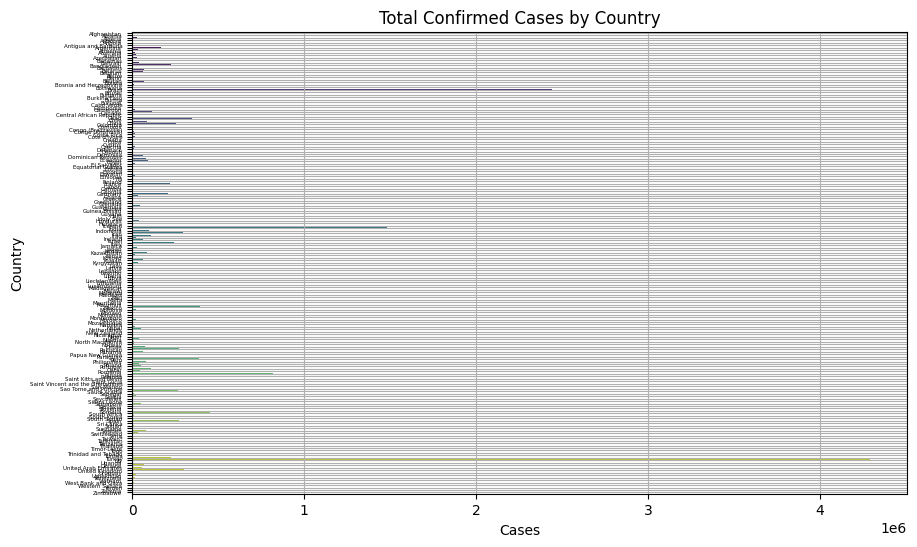

In [83]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Confirmed', y='Country', data=df, palette='viridis')
plt.title('Total Confirmed Cases by Country')
plt.xlabel('Cases')
plt.ylabel('Country')
plt.yticks(rotation=0, fontsize=4) 
plt.grid()
plt.show()

## Confirmed vs Deaths vs Recovered

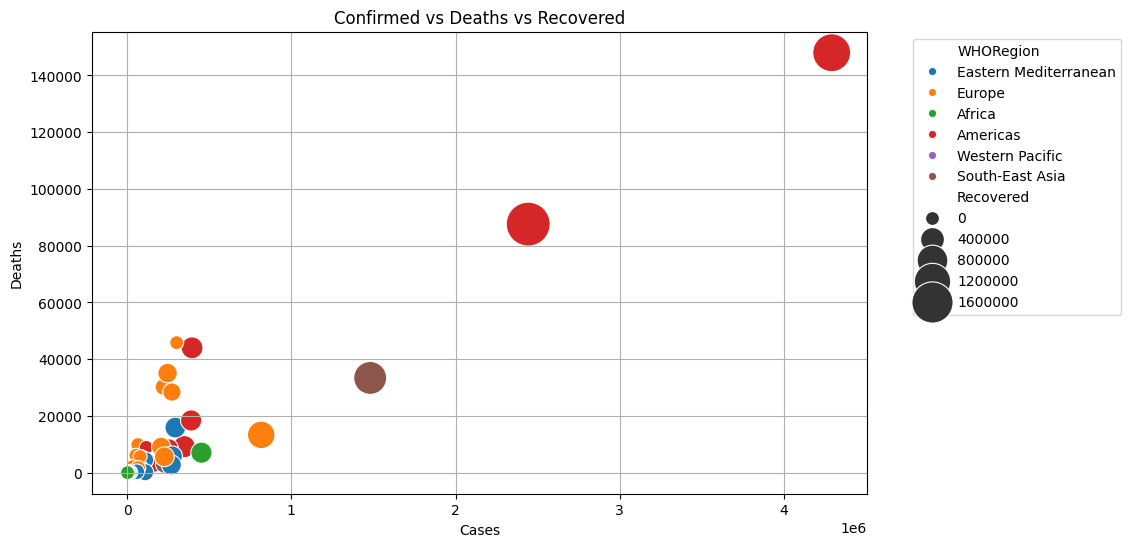

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Confirmed', y='Deaths', size='Recovered', sizes=(100, 1000), hue='WHORegion', data=df)
plt.title('Confirmed vs Deaths vs Recovered')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Cases Distribution by Continent

C:\Users\shubham bhosale\AppData\Local\Temp\ipykernel_8776\252470922.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WHORegion', y='Confirmed', data=df, palette='Set3')


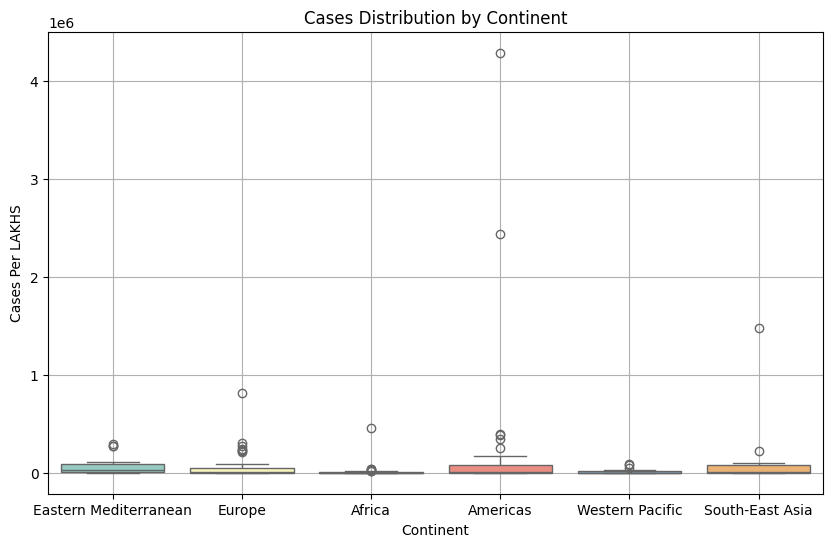

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='WHORegion', y='Confirmed', data=df, palette='Set3')
plt.title('Cases Distribution by Continent')
plt.xlabel('Continent')
plt.ylabel('Cases Per LAKHS')
plt.grid()
plt.show()

## Case Fatality Rate (CFR) by Country

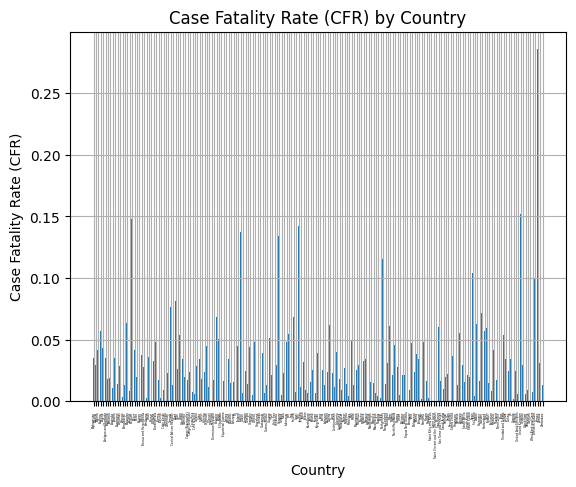

In [79]:
df['CFR'] = df['Deaths'] / df['Confirmed']
plt.bar(df['Country'], df['CFR'])
plt.xlabel('Country')
plt.ylabel('Case Fatality Rate (CFR)')
plt.title('Case Fatality Rate (CFR) by Country')
plt.xticks(rotation = 90 , fontsize = 2)
plt.grid()
plt.show()

## Distribution of Confirmed Cases, Recovered Cases, and Deaths by Country

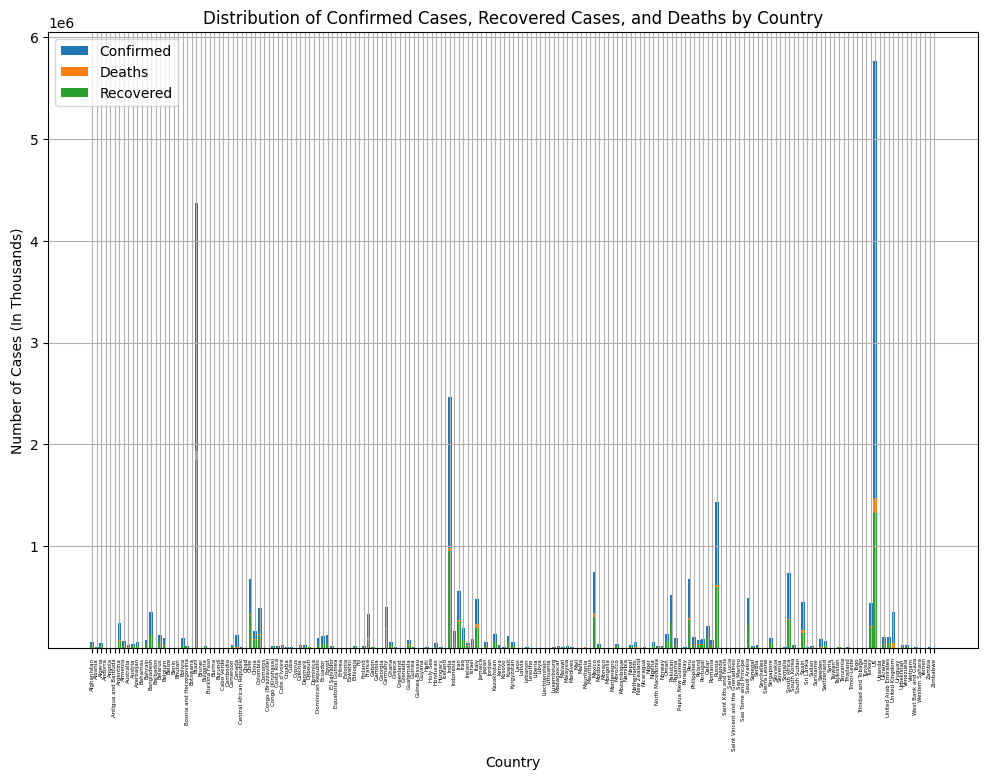

In [76]:
plt.figure(figsize=(12,8))
plt.bar(df['Country'], df['Confirmed'], bottom=df['Deaths']+df['Recovered'], label='Confirmed')
plt.bar(df['Country'], df['Deaths'], bottom=df['Recovered'], label='Deaths')
plt.bar(df['Country'], df['Recovered'], label='Recovered')
plt.xlabel('Country')
plt.ylabel('Number of Cases (In Thousands)')
plt.title('Distribution of Confirmed Cases, Recovered Cases, and Deaths by Country')
plt.xticks(rotation = 90 , fontsize = 4)
plt.legend()
plt.grid()
plt.show()

## Trends in New Cases, New Deaths, and New Recovered Cases by Country

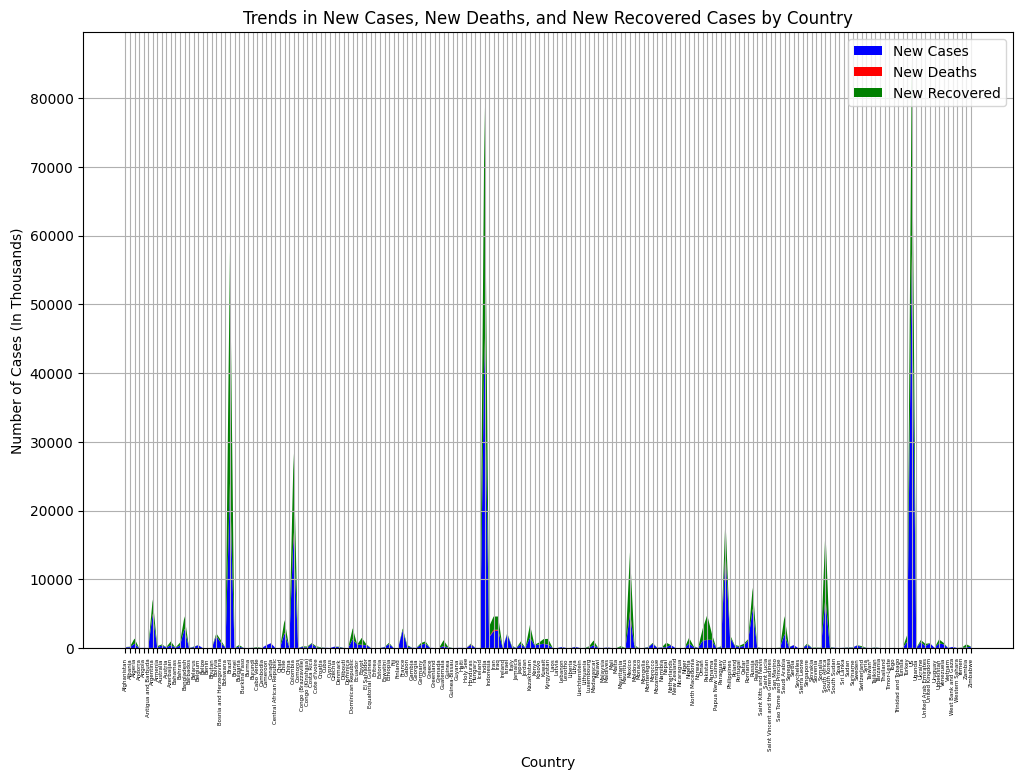

In [77]:
plt.figure(figsize=(12,8))
plt.stackplot(df['Country'], df['NewCases'], df['NewDeaths'], df['NewRecovered'], labels=['New Cases', 'New Deaths', 'New Recovered'], colors=['blue', 'red', 'green'])
plt.xlabel('Country')
plt.ylabel('Number of Cases (In Thousands)')
plt.title('Trends in New Cases, New Deaths, and New Recovered Cases by Country')
plt.legend()
plt.xticks(rotation = 90 , fontsize = 4)
plt.grid()
plt.show()

## Geographic Distribution of New Cases

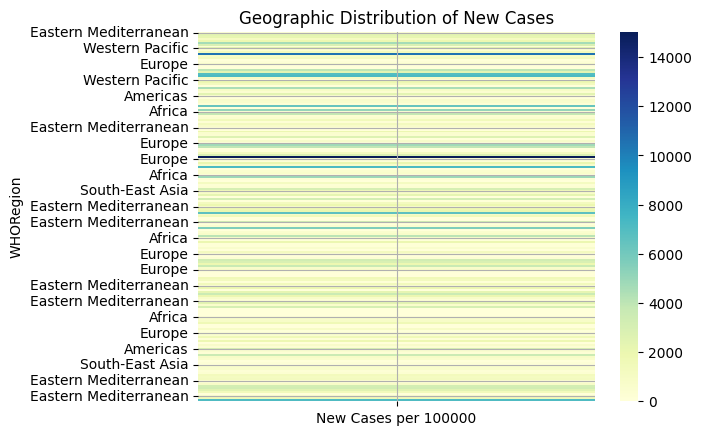

In [72]:
df['New Cases per 100000'] = df['NewCases'] / df['Confirmed'] * 100000
sns.heatmap(df[['WHORegion', 'New Cases per 100000']].set_index('WHORegion'), cmap='YlGnBu')
plt.title('Geographic Distribution of New Cases')
plt.grid()
plt.show()
